In [167]:
# Analyzing, cleaning, exploring data
import pandas as pd 
from pandas import DataFrame

# Performing math operations on arrays and other structures.
import numpy as np

# Visualizing data
import matplotlib.pyplot as plt 


from sklearn.preprocessing import LabelEncoder



## Importing data and extracting to a dataframe

In [168]:
import glob

new_list2 = []

columns = ['Timestamp', 'El1', 'El2', 'El3','El4', 'El5', 'El6','El7', 'El8']


# Specify the folder path where the CSV files are located
folder_path = "EMGforMSc/"

# Get a list of all CSV files in the folder
file_list = glob.glob(folder_path + "*.csv")

# Create an empty list to store the data from each CSV file
dataframes = []
total_num_rows = 0  # Variable to store the total number of rows
extracted_strings = []


# Loop through each CSV file, read it into a DataFrame, and append it to the list
for file in file_list:
    df = pd.read_csv(file, names=columns)
    num_rows = df.shape[0]
    
    file_name = file.split("/")[-1]  # Extract the file name from the file path
    extracted_string = re.search(r'-(.*?)-', file_name).group(1)  # Extract the desired string using regex
        
    extracted_strings.extend([extracted_string] * num_rows)
    
    
    extracted_numbers = re.findall(r'\d+', file)[0]

    
    new_list = [extracted_numbers] * num_rows
    new_list2.append(new_list)
    dataframes.append(df)
    
    total_num_rows += num_rows


# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

new_list2 = [item for sublist in new_list2 for item in sublist]  # Flatten the nested list


In [169]:
combined_df["P_ID"] = new_list2
combined_df["Gesture"] = extracted_strings

In [170]:
le = LabelEncoder()
combined_df['encoded_column'] = le.fit_transform(combined_df['Gesture'])

In [171]:
combined_df

,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,P_ID,Gesture,encoded_column
0,1644423099230,215,195,325,247,155,100,43,108,007,close,0
1,1644423099356,223,189,291,252,156,102,51,119,007,close,0
2,1644423099485,225,196,299,237,168,107,49,124,007,close,0
3,1644423099613,237,203,294,222,172,109,50,140,007,close,0
4,1644423099751,214,199,303,217,185,120,50,121,007,close,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170035,1644423400928,25,43,137,213,167,95,57,27,007,grasp,1
170036,1644423400934,26,41,132,186,164,106,64,30,007,grasp,1
170037,1644423400937,27,39,129,180,160,97,61,31,007,grasp,1
170038,1644423400943,26,34,82,228,155,88,66,31,007,grasp,1


In [172]:
combined_df.P_ID.value_counts()

004    38101
008    37693
014    36680
007    33826
011    23740
Name: P_ID, dtype: int64

In [173]:
combined_df.Gesture.value_counts()

open       29781
grasp      29147
tripod     28772
close      28028
neutral    27825
lateral    26487
Name: Gesture, dtype: int64

In [177]:
combined_df.encoded_column.value_counts()

4    29781
1    29147
5    28772
0    28028
3    27825
2    26487
Name: encoded_column, dtype: int64

In [ ]:
"""
0 - close
1 - grasp
2 - lateral
3 - neutral
4 - open 
5 - tripod

"""

## Data Cleaning

In [191]:
combined_df.describe(include="all")

,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,P_ID,Gesture,encoded_column
count,1.700400e+05,170040.000000,170040.000000,170040.000000,170040.000000,170040.000000,170040.000000,170040.000000,170040.000000,170040,170040,170040.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,004,open,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38101,29781,NaN
mean,1.645620e+12,95.440908,90.249218,133.326094,156.888232,155.255122,109.831898,68.489967,82.175306,NaN,NaN,2.520466
std,1.973880e+09,106.430625,80.225164,115.944014,140.512894,123.411894,81.833467,55.232661,114.232263,NaN,NaN,1.716665
min,1.643730e+12,13.000000,14.000000,14.000000,14.000000,12.000000,13.000000,13.000000,13.000000,NaN,NaN,0.000000
25%,1.644422e+12,25.000000,36.000000,47.000000,53.000000,67.000000,57.000000,34.000000,28.000000,NaN,NaN,1.000000
50%,1.644511e+12,39.000000,66.000000,103.000000,122.000000,130.000000,87.000000,51.000000,39.000000,NaN,NaN,3.000000
75%,1.647185e+12,134.000000,117.000000,181.000000,214.000000,204.000000,146.000000,88.000000,80.000000,NaN,NaN,4.000000


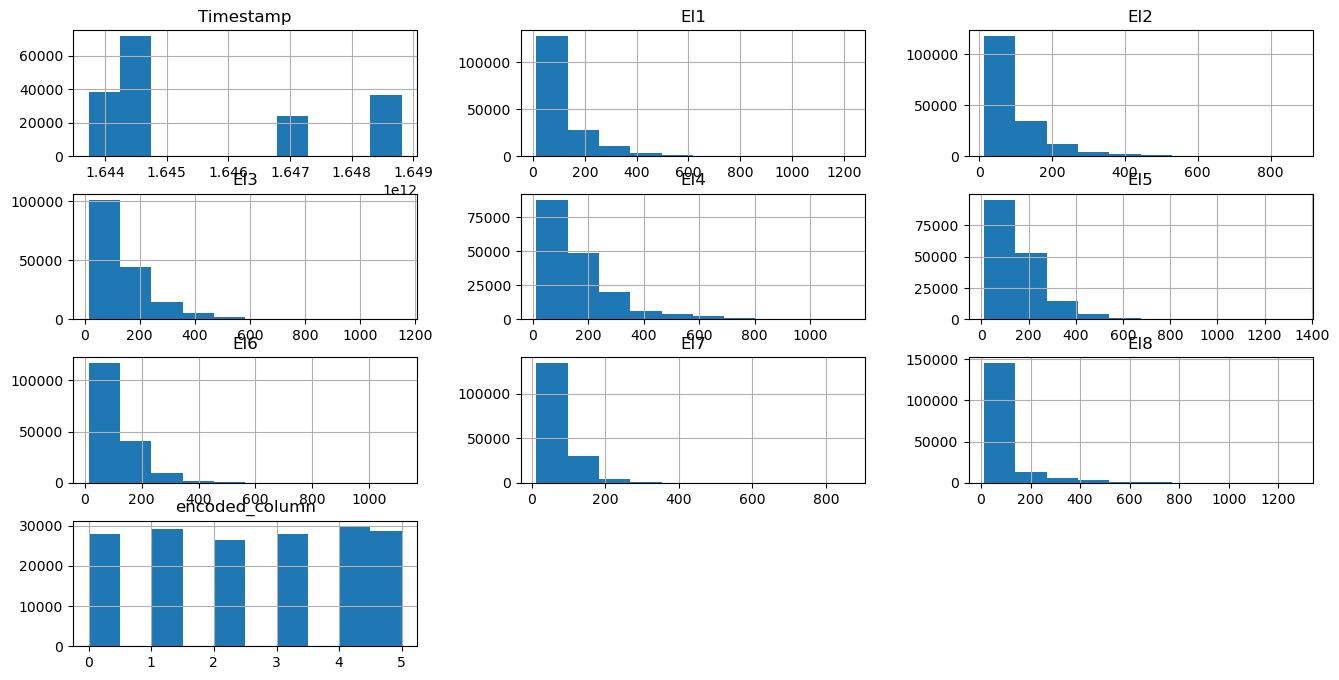

In [194]:
hist = combined_df.hist(figsize=(16, 8))

In [195]:
combined_df.isnull().sum().sort_values(ascending=False)

Timestamp         0
El1               0
El2               0
El3               0
El4               0
El5               0
El6               0
El7               0
El8               0
P_ID              0
Gesture           0
encoded_column    0
dtype: int64

In [197]:
skewness = combined_df.skew(axis = 0, skipna = True)
skewness

/var/folders/qx/kwxzb4sj2bjbxg1dwdlypnxc0000gn/T/ipykernel_60821/3167374977.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = combined_df.skew(axis = 0, skipna = True, numeric_only=None)


Timestamp         0.702138
El1               2.387443
El2               2.381785
El3               1.898778
El4               1.910403
El5               1.986358
El6               2.167929
El7               3.235128
El8               3.598130
P_ID              0.286722
encoded_column   -0.019571
dtype: float64

In [ ]:
# Data is slightly skewed


## Splitting data according to Patient IDs

In [178]:
patients = combined_df['P_ID'].unique()

In [179]:
gf = combined_df.groupby('P_ID')

gf.first('P_ID')


,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,encoded_column
P_ID,,,,,,,,,,
004,1643730978517,91,153,151,291,171,74,94,85,4
007,1644423099230,215,195,325,247,155,100,43,108,0
008,1644512197961,100,99,35,35,67,39,32,113,0
011,1647183003524,151,54,77,196,200,53,38,42,4
014,1648814233335,487,143,580,185,87,47,74,557,4


In [189]:
# Creating a dataframe for each P_ID
d = {}
for p in patients:
    d[p] = pd.DataFrame()

len(patients)

5

In [190]:
for p, new_df in d.items():
    d[p] = gf.get_group(p)
    print(p)

007
011
008
004
014


In [188]:
d["004"]

,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,P_ID,Gesture,encoded_column
1638,1643730978517,91,153,151,291,171,74,94,85,004,open,4
1639,1643730978643,96,161,155,300,176,84,101,77,004,open,4
1640,1643730978770,105,152,157,318,165,88,94,72,004,open,4
1641,1643730978896,106,148,133,305,141,88,88,68,004,open,4
1642,1643730979030,99,140,112,241,137,86,81,60,004,open,4
...,...,...,...,...,...,...,...,...,...,...,...,...
168553,1643730587674,62,91,75,219,89,63,82,32,004,open,4
168554,1643730587675,62,91,75,219,89,63,82,32,004,open,4
168555,1643730587680,59,84,70,204,94,84,69,28,004,open,4
168556,1643730587685,78,84,74,221,111,113,123,44,004,open,4
